# Spotify song recommendations model

## Data extraction and preparation
The source data was imported from Google Drive. The first column was dropped, as it did not contain usable data.

In [111]:
import pandas as pd
import numpy as np

#connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Import customers data (downloaded from Bloomreach) and and specify all columns as strings (they will be changed later)
spotifydata = pd.read_csv('/content/gdrive/MyDrive/Training + learning/Data Science apprenticeship degree/Modules/M5/Music analysis/spotifyData.csv')
spotifydata.drop(spotifydata.columns[0],axis=1,inplace=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


The first 5 rows were displayed as an initial verification step to ensure the import worked as intended. Additionally, the total sum of missing values in each column was calculated. No missing values were found.

In [112]:
# Check first 5 rows
print(spotifydata.head())
# Count any missing values
print("\n\nCheck missing values\n")
print(spotifydata.isnull().sum())

   danceability  energy  loudness  acousticness  instrumentalness  valence  \
0           2.0     2.0       3.0           2.0                 1      2.0   
1           3.0     2.0       2.0           0.0                 1      3.0   
2           3.0     3.0       2.0           0.0                 1      2.0   
3           2.0     1.0       3.0           3.0                 0      1.0   
4           3.0     3.0       4.0           1.0                 0      3.0   

   tempo  genre  like  
0    0.0      5     1  
1    1.0      4     1  
2    3.0     10     1  
3    2.0      8     1  
4    0.0      7     1  


Check missing values

danceability        0
energy              0
loudness            0
acousticness        0
instrumentalness    0
valence             0
tempo               0
genre               0
like                0
dtype: int64


## Data transformation

The numerical codes in the 'genre' column were replaced with descriptive values, for easier downstream interpretation.

In [113]:
# Create dictionary of genre codes and names
di = { 1: 'country', 2:'trap',3:'edm', 4:'electronic', 5: 'funk', 6: 'rock', 7: 'hip hop', 8: 'soul', 9: 'r&b', 10: 'jazz', 11: 'pop'}

# Map the descriptive values to the column
spotifydata['genre'] = spotifydata['genre'].map(di)

# Check the results
print("Count of songs by genre\n")
print(spotifydata['genre'].value_counts())

Count of songs by genre

genre
pop           114
hip hop       109
jazz           92
edm            72
country        72
rock           39
r&b            32
funk           26
trap           17
soul           15
electronic     12
Name: count, dtype: int64


The data types of all columns was assessed. The only column that needed to be changed was the 'like' column; this was transformed from an integer to boolean.

In [114]:
# Check data types, and convert them if needed
print("Check data types\n")
spotifydata.info()
spotifydata['like'] = spotifydata['like'].astype(bool)

Check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      600 non-null    float64
 1   energy            600 non-null    float64
 2   loudness          600 non-null    float64
 3   acousticness      600 non-null    float64
 4   instrumentalness  600 non-null    int64  
 5   valence           600 non-null    float64
 6   tempo             600 non-null    float64
 7   genre             600 non-null    object 
 8   like              600 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 42.3+ KB


## Exploratory data analysis

The mean values of each song variable was calculated for each genre, and displayed in a table. It shows that XXXXX

In [119]:
grouped_data = spotifydata.groupby('genre').mean()
grouped_data = grouped_data.drop(columns=['like']) # drop the like column
from IPython.display import display
print("Mean values across genres")
display(grouped_data.apply(lambda x: round(x, 2))) # round the mean values to 2 decimal places

Mean values across genres


,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo
genre,,,,,,,
country,2.10,2.92,3.83,0.68,0.00,1.72,1.90
edm,2.33,3.68,3.68,0.12,0.39,0.57,1.97
electronic,2.75,3.42,3.50,0.08,0.50,1.58,2.00
funk,2.77,2.15,2.77,1.27,0.42,2.77,1.19
hip hop,2.68,2.66,3.38,0.84,0.14,1.94,1.53
jazz,2.07,1.92,2.58,1.65,0.72,2.21,1.57
pop,2.65,2.86,3.64,0.73,0.06,1.84,1.86
r&b,2.56,2.09,2.88,1.22,0.16,2.03,1.44
rock,2.15,2.59,3.26,0.90,0.26,1.97,1.92


A stacked bar chart was created to visualise the split of liked and disliked songs across each genre. Green and red colours were intentionally selected as an intuitive way to highlight liked and disliked songs respectively. To account for visual impairments such as colour-blindness, a hashed pattern was also applied to the red sections to further emphasise the difference.

In [120]:
grouped_data_2 = spotifydata.groupby(['genre', 'like']).size().reset_index(name='count')
import plotly.express as px
fig = px.bar(grouped_data_2, x="genre", y="count", color="like",
             pattern_shape="like", pattern_shape_sequence=["x",""],
             barmode='stack',
             color_discrete_map={False: 'red', True: 'green'},
             labels={"count": "Number of songs", "genre": "Song genre",})
fig.update_layout(title={
        'text': "Number of liked and disliked songs by genre", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout({'plot_bgcolor': '#f6f6f6', 'paper_bgcolor': 'white'})
fig.update_layout(legend_title=None)
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name
custom_legend_name(['Dislike','Like'])
fig.show()

 The bar chart showed that XXXX

In [ ]:
# Add some EDA steps here:
  # Check the target variable is balanced between likes and dislikes
  # Understand the mix of the predictors, e.g. plot a bar chart of the genres to see the split, and stack the colours based on if they are liked/not liked - to easily visualise preferred genres
  # Look for outliers in the numerical predictors (whisker plots?)
  # Sum this up in some bullets, e.g. "The average energy rating of liked songs is higher than disliked songs / The user prefers high energy songs"

## Further data transformation

Before the logistic regression model could be built, further data transformation was required. The 'genre' column needed to be unpivoted so that each genre was stored as a separate column and populated with binary values (1 or 0).

In [122]:
# Pivot the genre column into its own table and fill empty values with '0'
genre = spotifydata.pivot(columns='genre', values='genre').reset_index().fillna('0')
genre.drop(genre.columns[0],axis=1,inplace=True) # drop the first column

# Replace all non-0 values with 1
genre["country"]=genre["country"].replace('country', '1')
genre["trap"]=genre["trap"].replace('trap', '1')
genre["edm"]=genre["edm"].replace('edm', '1')
genre["electronic"]=genre["electronic"].replace('electronic', '1')
genre["funk"]=genre["funk"].replace('funk', '1')
genre["rock"]=genre["rock"].replace('rock', '1')
genre["hip hop"]=genre["hip hop"].replace('hip hop', '1')
genre["soul"]=genre["soul"].replace('soul', '1')
genre["r&b"]=genre["r&b"].replace('r&b', '1')
genre["jazz"]=genre["jazz"].replace('jazz', '1')
genre["pop"]=genre["pop"].replace('pop', '1')

# Change data type to integer
genre = genre.apply(pd.to_numeric)

# Check the result
print(genre.head())

genre  country  edm  electronic  funk  hip hop  jazz  pop  r&b  rock  soul  \
0            0    0           0     1        0     0    0    0     0     0   
1            0    0           1     0        0     0    0    0     0     0   
2            0    0           0     0        0     1    0    0     0     0   
3            0    0           0     0        0     0    0    0     0     1   
4            0    0           0     0        1     0    0    0     0     0   

genre  trap  
0         0  
1         0  
2         0  
3         0  
4         0  


The 'genre' table created in the previous step was then merged back with the original 'spotifydata' table. By default, this was an inner join – this is what was required in this instance, as only the values that matched across both tables were of interest. After merging, the original 'genre' column was dropped, as it had been superceded by the new columns.

In [123]:
# Merge the tables and drop the original genre column
spotifydata = pd.merge(spotifydata, genre, left_index=True, right_index=True)
spotifydata = spotifydata.drop('genre', axis=1)

# Check the result of the merged table
print(spotifydata.head())

   danceability  energy  loudness  acousticness  instrumentalness  valence  \
0           2.0     2.0       3.0           2.0                 1      2.0   
1           3.0     2.0       2.0           0.0                 1      3.0   
2           3.0     3.0       2.0           0.0                 1      2.0   
3           2.0     1.0       3.0           3.0                 0      1.0   
4           3.0     3.0       4.0           1.0                 0      3.0   

   tempo  like  country  edm  electronic  funk  hip hop  jazz  pop  r&b  rock  \
0    0.0  True        0    0           0     1        0     0    0    0     0   
1    1.0  True        0    0           1     0        0     0    0    0     0   
2    3.0  True        0    0           0     0        0     1    0    0     0   
3    2.0  True        0    0           0     0        0     0    0    0     0   
4    0.0  True        0    0           0     0        1     0    0    0     0   

   soul  trap  
0     0     0  
1     0     

A final check was run on the completed, merged table. No missing values or erroneous data types were identified.

In [125]:
# check for missing values in any of the columns
print("Check missing values and data types")
spotifydata.info()

Check missing values and data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      600 non-null    float64
 1   energy            600 non-null    float64
 2   loudness          600 non-null    float64
 3   acousticness      600 non-null    float64
 4   instrumentalness  600 non-null    int64  
 5   valence           600 non-null    float64
 6   tempo             600 non-null    float64
 7   like              600 non-null    bool   
 8   country           600 non-null    int64  
 9   edm               600 non-null    int64  
 10  electronic        600 non-null    int64  
 11  funk              600 non-null    int64  
 12  hip hop           600 non-null    int64  
 13  jazz              600 non-null    int64  
 14  pop               600 non-null    int64  
 15  r&b               600 non-null    int64  
 16  rock    

##Further exploratory data analysis

The correlations of each variable with the "like" column was calculated, to assess which variables might be the most effective as predictor variables in the model. To ease interpretation of this data, a heatmap was applied so that the strongest correlating variables would be highlighted in a darker shade. The variables were also sorted in descending order of correlation, so the most significant values would be at the top (if they positively correlate), or at the bottom (if they negatively correlate).

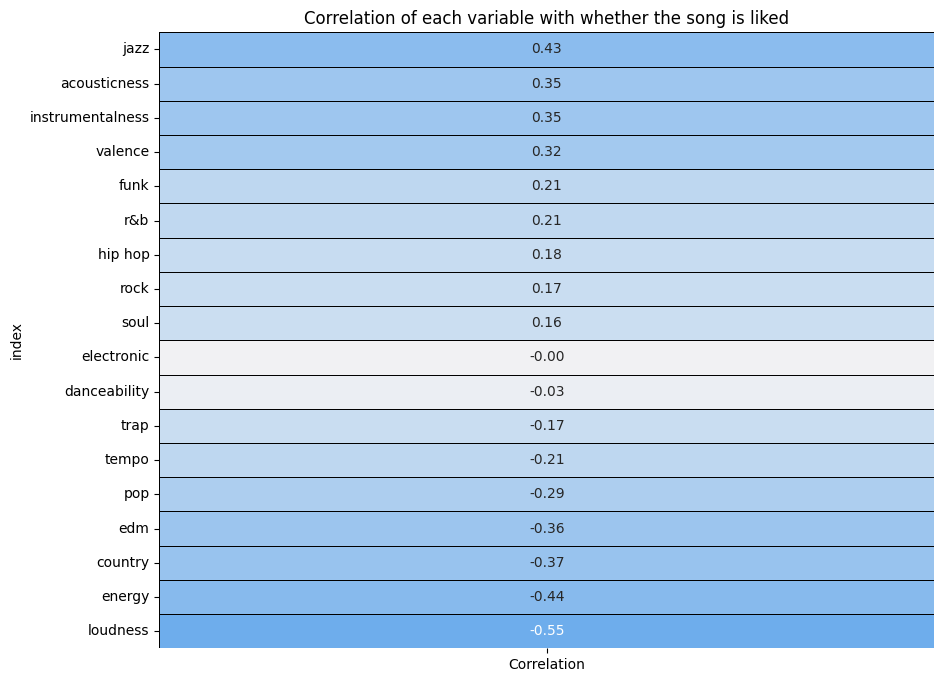

In [126]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns

# set the target variable
target_column = 'like'

# Calculate the correlation matrix
correlation_matrix = spotifydata.corr()

# Get the correlations with the target column
target_correlations = correlation_matrix[target_column]

# Drop the correlation of the target column with itself
target_correlations = target_correlations.drop(labels=[target_column])

# Convert the series to a DataFrame for better visualization
target_correlations_df = target_correlations.reset_index().rename(columns={target_column: 'Correlation'})

# Set the index to the predictor variables
target_correlations_df = target_correlations_df.set_index('index')
target_correlations_df = target_correlations_df.sort_values(by=['Correlation'], ascending=False)

# Plot the heatmap version 1
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(255,255, s=100, as_cmap=True)
sns.heatmap(target_correlations_df, annot=True, cmap=cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black', cbar=False)
plt.title(f'Correlation of each variable with whether the song is liked')
plt.show()

The chart above shows XXXXX

### Check for multicollinearity
The correlation of each variable with every other variable was calculated and plotted in a heatmap. This provides a quick way to visualise any potential multicollinearity between the variables, which could have implications on the success of the model.

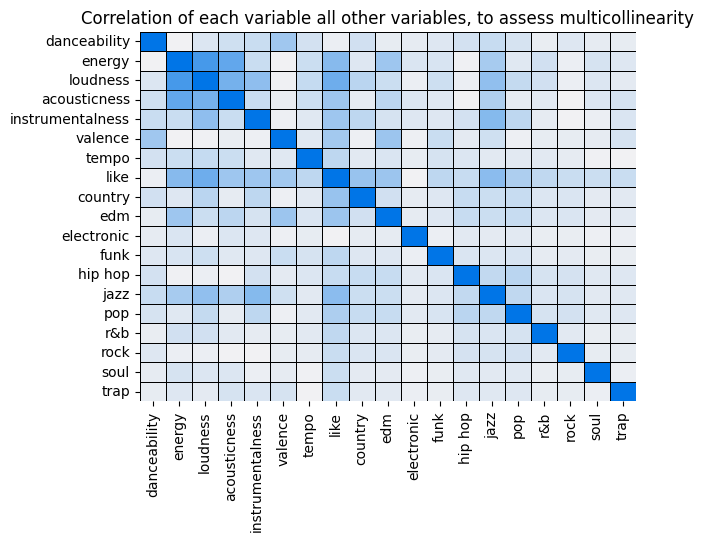

In [127]:
# check for multicollinearity with a heatmap
sns.heatmap(spotifydata.corr(), annot=False, cmap=cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black', cbar=False)
plt.title(f'Correlation of each variable all other variables, to assess multicollinearity')
plt.show()

The above heatmap shows XXX

## Building the logistic regression model

With the data imported, cleaned and transformed, the logistic regression model was then built.

In [ ]:
# Split dataset into predictor and target variables
predictor_variables = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'country', 'trap', 'edm', 'electronic', 'funk', 'rock', 'hip hop', 'soul', 'r&b', 'jazz', 'pop']
X = spotifydata[predictor_variables] # Predictors
y = spotifydata.like # Target variable

# Split the data into training and testing data sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Import the required class
from sklearn.linear_model import LogisticRegression

# Run the logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

### Confusion matrix

With the model run, the results were then visualised in a confusion matrix. This plots the overlap between the true measured values in the data set, against what the model has predicted. The resultant 4 quadrants were colour coded via a heatmap, to visually emphasise the highest values.

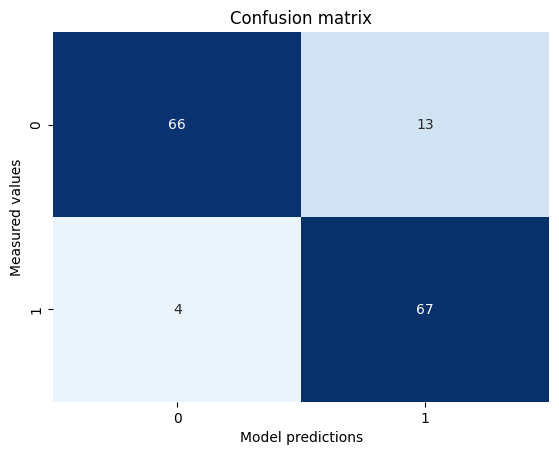

In [134]:
# Create a confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues", fmt='g', cbar=False, vmin=0)
plt.title('Confusion matrix', y=1)
plt.ylabel('Measured values')
plt.xlabel('Model predictions')
plt.show()

The confusion matrix shows XXXXX

 Performance metrics were then calculated and displayed. XXXXXX

In [137]:
from sklearn.metrics import classification_report
target_names = ['like', 'dislike']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        like       0.94      0.84      0.89        79
     dislike       0.84      0.94      0.89        71

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



### ROC curve

An ROC (Receiver Operating Characteristic) curve was plotted. XXXX

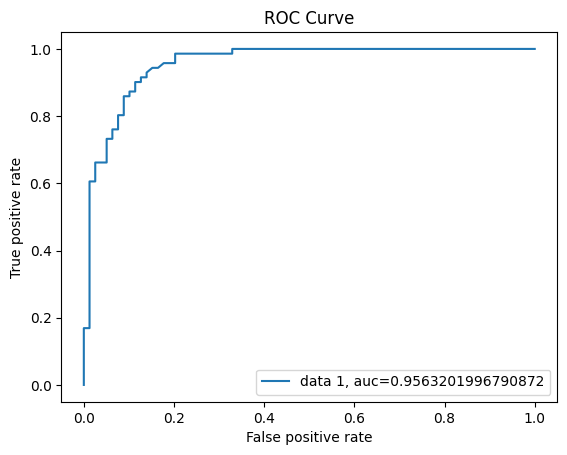

In [140]:
y_pred_probability = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC Curve', y=1)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()